importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [ ]:
# preprocessing
from sklearn.preprocessing import StandardScaler

# for pca
from sklearn.decomposition import PCA

# for clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage,dendrogram

# evaluations metrics
from sklearn.metrics import confusion_matrix


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv",sep="\t")

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

but here we can see that there are 24 rows which have null values

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
df.duplicated().sum()

0

there are no duplicated rows

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
print("The newest customer's enrolment date in the records:", max(df['Dt_Customer']))
print("The oldest customer's enrolment date in the records:", min(df['Dt_Customer']))

The newest customer's enrolment date in the records: 2014-12-06 00:00:00
The oldest customer's enrolment date in the records: 2012-01-08 00:00:00


In [ ]:
#Extracting the age
df['Age'] = 2023 - df['Year_Birth']

In [ ]:
#Total amount spent
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
#Living With whom
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Absurd':'Alone','Widow':'Alone','YOLO':'Alone','Divorced':'Alone','Single':'Alone'})

In [ ]:
#No.of kids in the household
df['Children'] = df['Kidhome'] + df['Teenhome']

In [ ]:
#Total no. of members in the family
df['Family_Size'] = df['Living_With'].replace({'Alone': 1,'Partner':2}) + df['Children']

In [ ]:
#parent or not
df['Is_Parent'] = np.where(df.Children > 0,1,0)

In [ ]:
#Education
df['Education'] = df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [ ]:
#dropping unnecessary cols
to_drop = ['Marital_Status','Dt_Customer','Z_CostContact','Z_Revenue','Year_Birth','ID']
df = df.drop(to_drop,axis=1)

In [ ]:
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,66,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,69,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,58,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,39,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,42,422,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,56,1341,Partner,1,3,1
2236,Postgraduate,64014.0,2,1,56,406,0,30,0,0,...,1,0,0,0,77,444,Partner,3,5,1
2237,Graduate,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,42,1241,Alone,0,1,0
2238,Postgraduate,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,67,843,Partner,1,3,1


In [ ]:
df.shape

(2216, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntWines             2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,54.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,2525.000000,3.000000,5.000000,1.000000


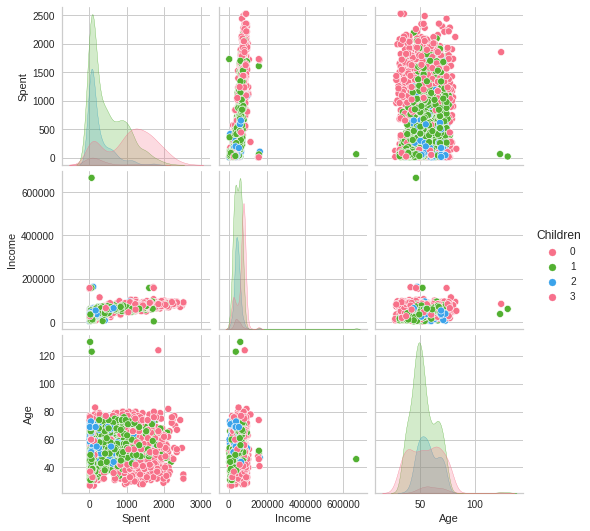

In [ ]:
sns.pairplot(df,vars=['Spent','Income','Age'],hue='Children',palette='husl')

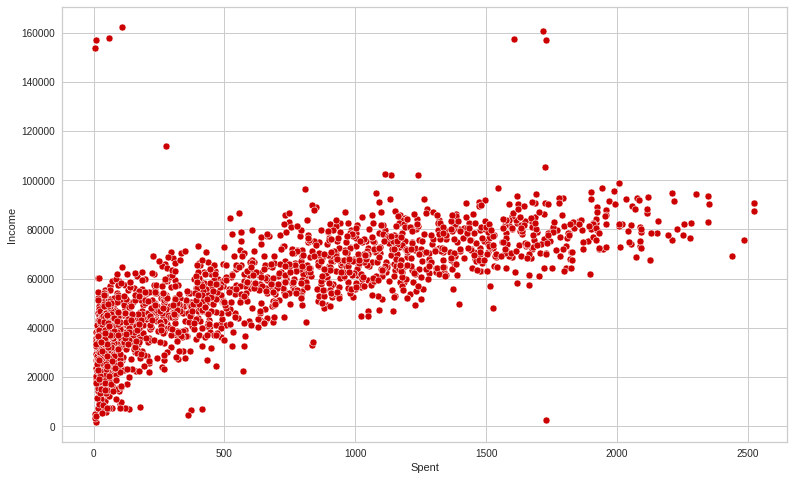

In [ ]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df[df['Income']<600000]['Spent'],y=df[df['Income']<600000]['Income'],color='#cc0000');

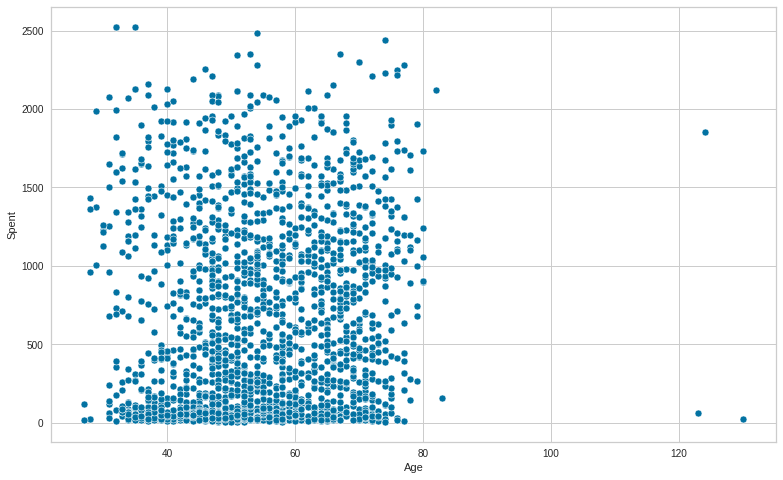

In [ ]:
plt.figure(figsize=(13,8))
sns.scatterplot(y=df['Spent'],x=df['Age'])

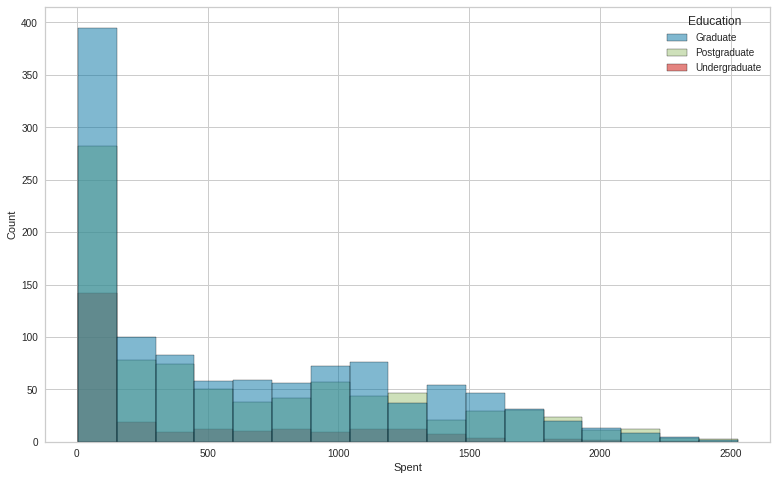

In [ ]:
plt.figure(figsize=(13,8))
sns.histplot(x=df['Spent'],hue=df['Education'])

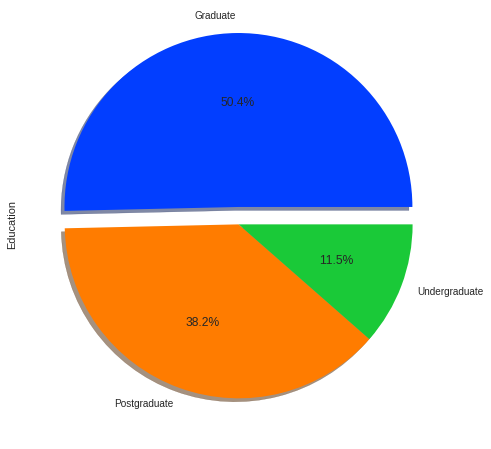

In [ ]:
df['Education'].value_counts().plot.pie(explode=[0.1,0,0],autopct='%1.1f%%',shadow=True,figsize=(8,8),colors=sns.color_palette('bright'))

OUTLIER DETECTION

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


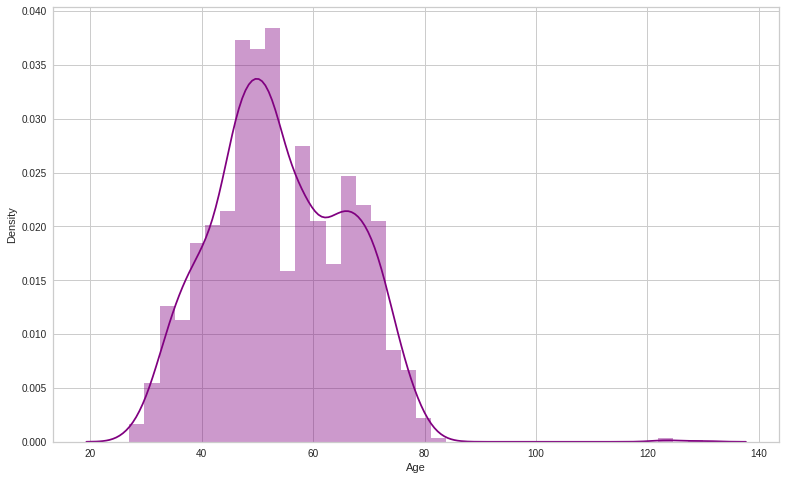

In [ ]:
plt.figure(figsize=(13,8))
sns.distplot(df.Age,color='purple')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


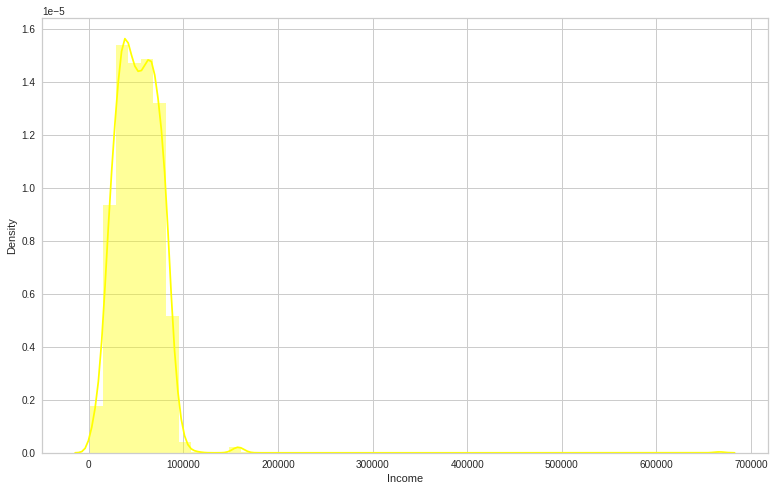

In [ ]:
plt.figure(figsize=(13,8))
sns.distplot(df.Income,color='Yellow');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


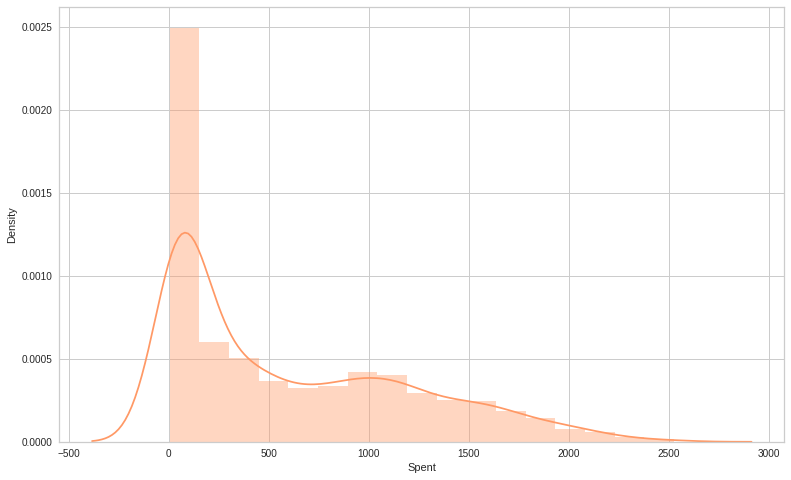

In [ ]:
plt.figure(figsize=(13,8))
sns.distplot(df.Spent,color='#ff9966')

In [ ]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Box(y=df['Age'],notched=True,name='Age',marker_color='#6699ff',boxmean=True,boxpoints='suspectedoutliers'),1,2)
fig.add_trace(go.Box(y=df['Income'],notched=True,name='Income',marker_color='#ff0066',boxmean=True,boxpoints='suspectedoutliers'),1,1)
fig.add_trace(go.Box(y=df['Spent'],notched=True,name='Spent',marker_color='lightseagreen',boxmean=True,boxpoints='suspectedoutliers'),1,3)
fig.update_layout(title_text='Box Plots for Numerical Variables to find the outliers ')
fig.show()

In [ ]:
numerical=['Income','Recency','Age','Spent']

In [ ]:
def to_detect_outliers(dt):
  for i in dt:
    Q3,Q1=np.percentile(df[i],[75,25])
    IQR=Q3-Q1

    lowerlimit=Q1-(1.5*IQR)
    upperlimit=Q3+(1.5*IQR)

    outliers=df[i][(df[i]>upperlimit) | (df[i]<lowerlimit)]
    print(f'{i} Outlier points\n=======================\n',outliers,'\n')

In [ ]:
to_detect_outliers(numerical)

Income Outlier points
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

Recency Outlier points
 Series([], Name: Recency, dtype: int64) 

Age Outlier points
 192    123
239    130
339    124
Name: Age, dtype: int64 

Spent Outlier points
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



In [ ]:
#removing outliers
df=df[(df['Age']<100)]
df=df[(df['Income']<600000)]

In [ ]:
df.shape

(2212, 29)

4 datapoints have been removed

In [ ]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [ ]:
df['Education'].dtype

dtype('O')

In [ ]:
categorical = [x for x in df.columns if df[x].dtype=='O']

In [ ]:
categorical

['Education', 'Living_With']

In [ ]:
#encoding the categorical variables
df['Education'] = df['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})
df['Living_With'] = df['Living_With'].map({'Alone':0,'Partner':1})

In [ ]:
df.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Spent                    int64
Living_With              int64
Children                 int64
Family_Size              int64
Is_Parent                int64
dtype: object

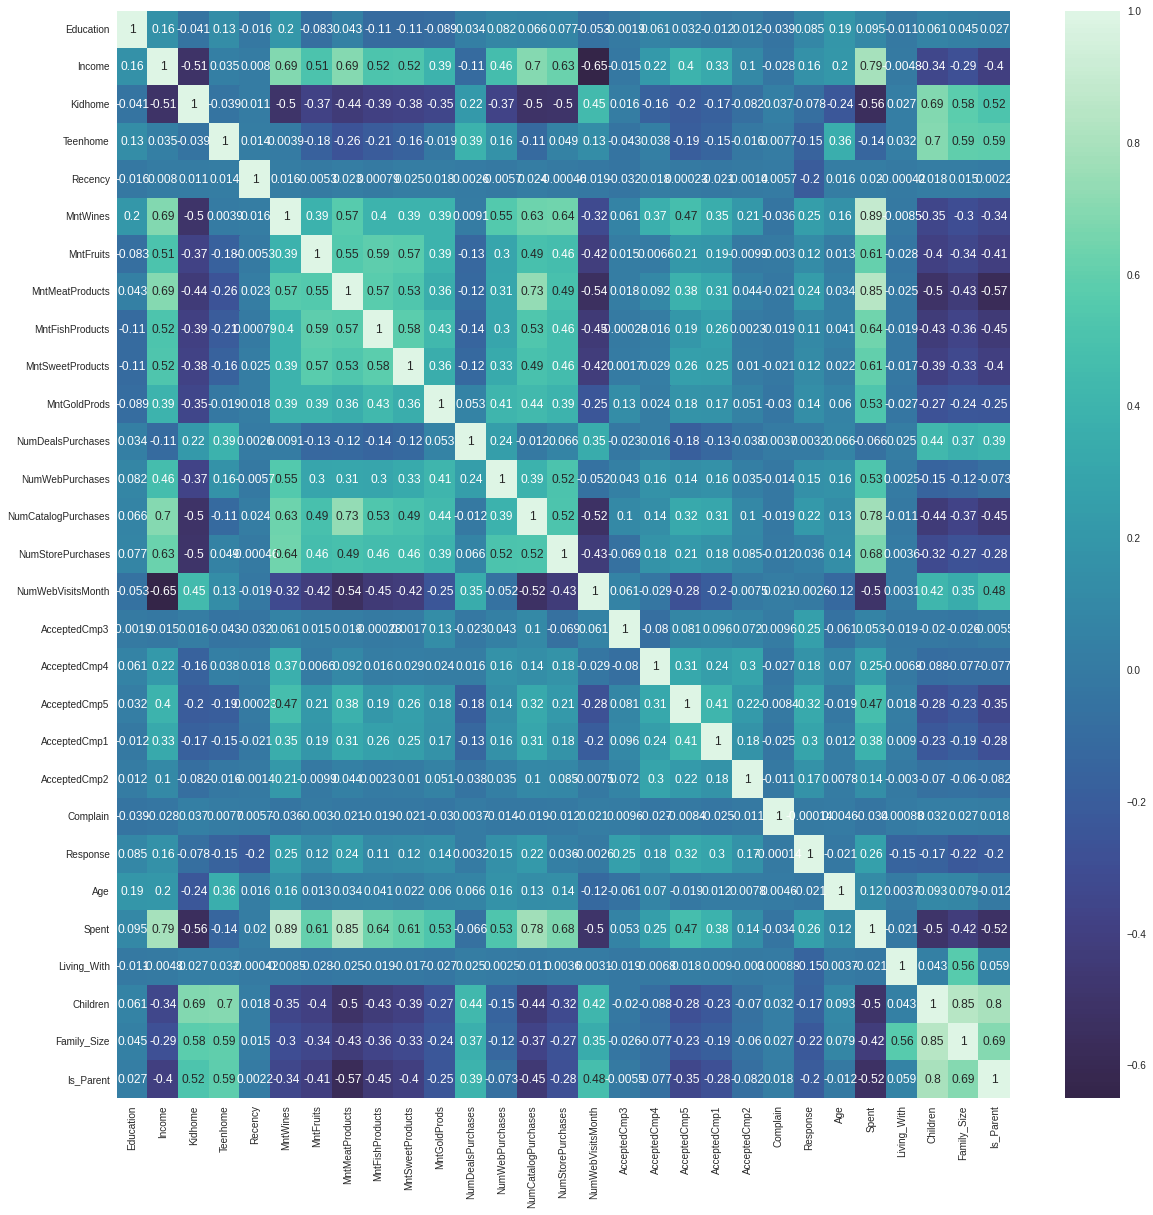

In [ ]:
corrmat=df.corr()
plt.figure(figsize=(20,20)) 
sns.heatmap(corrmat,annot=True,cmap='mako',center=0)

Scaling Numerical variables

In [ ]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [ ]:
# z=(x-mue)/sigma
df_old=df.copy()

In [ ]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [ ]:
df_old

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,1,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,66,1617,0,0,1,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,69,27,0,2,3,1
2,1,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,58,776,1,0,2,0
3,1,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,39,53,1,1,3,1
4,2,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,42,422,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,56,1341,1,1,3,1
2236,2,64014.0,2,1,56,406,0,30,0,0,...,1,0,0,0,77,444,1,3,5,1
2237,1,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,42,1241,0,0,1,0
2238,2,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,67,843,1,1,3,1


In [ ]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [ ]:
columns_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df=df.drop(columns_del,axis=1)

In [ ]:
scaler = StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [ ]:
df.head(5)

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.411675,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,1.123949,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [ ]:
len(df.columns)

22

Scaling has been done for PCA, now let's perform dimensionality reduction (PCA)

In [ ]:
pca=PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

In [ ]:
pca.components_

array([[ 1.13474333e-02,  2.79487030e-01, -2.46222459e-01,
        -9.87089635e-02,  3.52661162e-03,  2.55717216e-01,
         2.38397554e-01,  2.85461865e-01,  2.48710784e-01,
         2.37301174e-01,  1.88380883e-01, -7.82604447e-02,
         1.67559851e-01,  2.77348851e-01,  2.41542944e-01,
        -2.25949383e-01,  3.84649700e-02,  3.20099483e-01,
        -2.75762214e-02, -2.48087385e-01, -2.19729469e-01,
        -2.42808242e-01],
       [ 1.40712591e-01,  1.78237353e-01,  5.19975193e-03,
         4.62121007e-01,  1.62541563e-02,  2.09374497e-01,
         1.10823024e-02,  9.93015315e-03,  1.69665050e-04,
         2.16898367e-02,  1.23039679e-01,  3.48764267e-01,
         2.96776844e-01,  1.05995603e-01,  2.05461645e-01,
         4.60973805e-02,  2.34757227e-01,  1.33701131e-01,
         1.25510936e-01,  3.39312091e-01,  3.46877890e-01,
         2.92286785e-01],
       [-5.06398216e-01, -7.55446560e-02,  2.83991725e-01,
        -1.52214685e-01,  3.61406855e-02, -1.16333338e-01,
    

In [ ]:
print(pca.components_.T) # 22 X 3
W=pca.components_.T

[[ 1.13474333e-02  1.40712591e-01 -5.06398216e-01]
 [ 2.79487030e-01  1.78237353e-01 -7.55446560e-02]
 [-2.46222459e-01  5.19975193e-03  2.83991725e-01]
 [-9.87089635e-02  4.62121007e-01 -1.52214685e-01]
 [ 3.52661162e-03  1.62541563e-02  3.61406855e-02]
 [ 2.55717216e-01  2.09374497e-01 -1.16333338e-01]
 [ 2.38397554e-01  1.10823024e-02  2.53031265e-01]
 [ 2.85461865e-01  9.93015315e-03  7.55076515e-02]
 [ 2.48710784e-01  1.69665050e-04  2.57437742e-01]
 [ 2.37301174e-01  2.16898367e-02  2.55545809e-01]
 [ 1.88380883e-01  1.23039679e-01  2.01958160e-01]
 [-7.82604447e-02  3.48764267e-01  1.50992369e-01]
 [ 1.67559851e-01  2.96776844e-01  2.32685298e-02]
 [ 2.77348851e-01  1.05995603e-01  1.54782995e-02]
 [ 2.41542944e-01  2.05461645e-01 -7.26343573e-03]
 [-2.25949383e-01  4.60973805e-02  9.12833029e-02]
 [ 3.84649700e-02  2.34757227e-01 -4.27476073e-01]
 [ 3.20099483e-01  1.33701131e-01  3.78268460e-02]
 [-2.75762214e-02  1.25510936e-01  3.00414384e-01]
 [-2.48087385e-01  3.39312091e-

In [ ]:
pd.DataFrame(W,index=df.columns,columns=['W1','W2','W3'])

,W1,W2,W3
Education,0.011347,0.140713,-0.506398
Income,0.279487,0.178237,-0.075545
Kidhome,-0.246222,0.005200,0.283992
Teenhome,-0.098709,0.462121,-0.152215
Recency,0.003527,0.016254,0.036141
MntWines,0.255717,0.209374,-0.116333
MntFruits,0.238398,0.011082,0.253031
MntMeatProducts,0.285462,0.009930,0.075508
MntFishProducts,0.248711,0.000170,0.257438
MntSweetProducts,0.237301,0.021690,0.255546


In [ ]:
pca.explained_variance_

array([8.27465625, 2.92091426, 1.43051327])

In [ ]:
pca.explained_variance_ratio_ #(eigenvalue / total eigenvalues) 

array([0.3759507 , 0.13270881, 0.06499393])

Text(0, 0.5, 'Explained Variance')

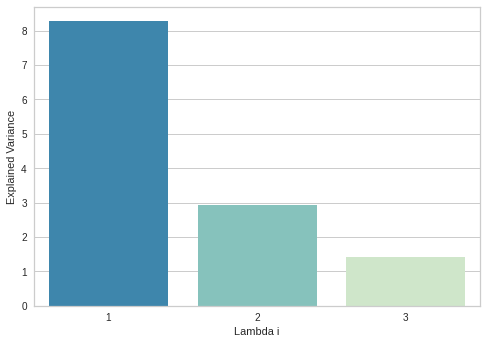

In [ ]:
sns.barplot(x=list(range(1,4)),y=pca.explained_variance_,palette='GnBu_r')
plt.xlabel('Lambda i')#eigen values
plt.ylabel('Explained Variance')

In [ ]:
df_PCA=pd.DataFrame(pca.transform(df),columns=(['w1', 'w2', 'w3']))
df_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
w1,2212.0,7.709324e-17,2.876570,-5.915032,-2.548037,-0.784932,2.418554,7.441148
w2,2212.0,2.569775e-17,1.709068,-4.398376,-1.343464,-0.133280,1.243012,6.248093
w3,2212.0,7.227492e-17,1.196067,-3.539820,-0.862327,-0.016595,0.824695,5.039355


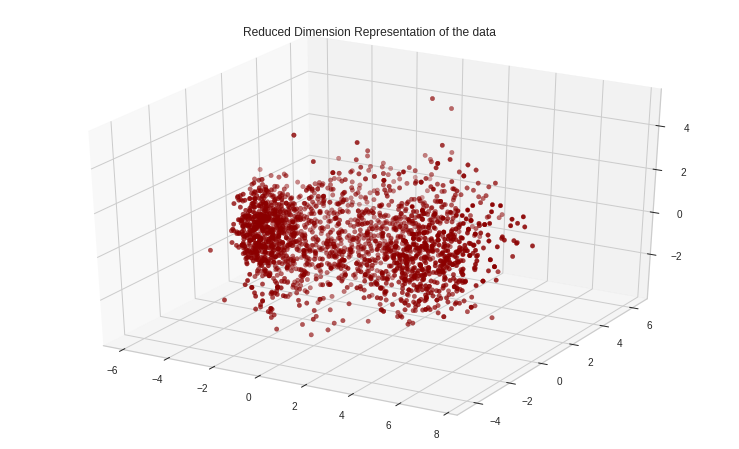

In [ ]:
# to visualize
x=df_PCA['w1']
y=df_PCA['w2']
z=df_PCA['w3']

fig=plt.figure(figsize=(13,8))
ax=fig.add_subplot(111, projection='3d')#since there are 3 vectors -3D
ax.scatter(x,y,z, c='darkred', marker='o')
ax.set_title('Reduced Dimension Representation of the data')
plt.show()

With the reduced dimensions from PCA, now clustering can be done

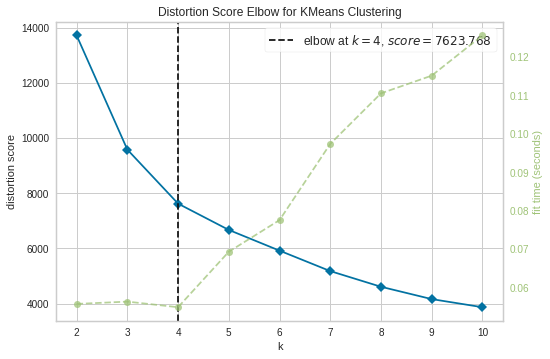

In [ ]:
#The KElbowVisualizer - elbow method to help data scientists select the optimal number of clusters by fitting the model with a range of values
Elbow_Method=KElbowVisualizer(KMeans(),k=10)  #distortion - computes the sum of squared distances from each point to its assigned center
Elbow_Method.fit(df_PCA)
Elbow_Method.show()

Here we can see that the optimal number of clusters is 4.

In [ ]:
AC=AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
predict_AC=AC.fit_predict(df_PCA)
df_PCA['Clusters']=predict_AC

#Adding the Clusters feature to the orignal dataframe.
df['Clusters']=predict_AC
df_old['Clusters']=predict_AC

In [ ]:
df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139,2
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456,3
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139,2
3,-0.411675,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456,0
4,1.123949,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.411675,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,0.111982,-0.555814,-0.132545,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456,1
2208,1.123949,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,-0.229679,-0.248141,0.692181,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456,3
2209,-0.411675,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,0.111982,2.213242,0.279818,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139,2
2210,1.123949,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,0.795303,1.290224,-0.957271,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456,1


In [ ]:
df['Clusters'].value_counts()

3    637
0    563
1    537
2    475
Name: Clusters, dtype: int64

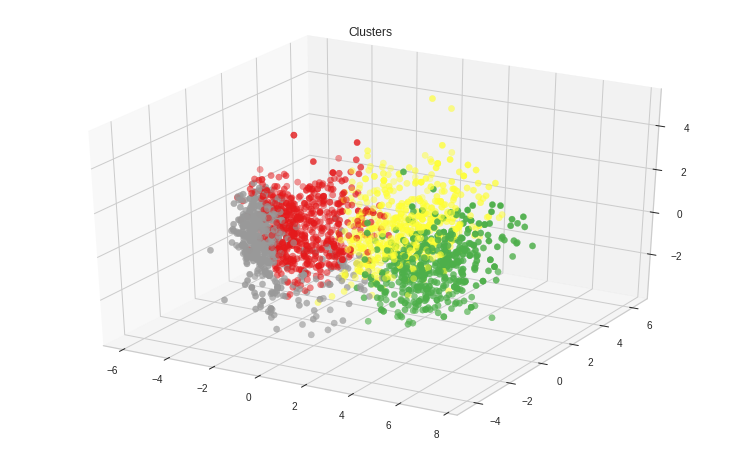

In [ ]:
fig=plt.figure(figsize=(13,8))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=df_PCA['Clusters'],marker='o',cmap='Set1_r')
ax.set_title('Clusters')
plt.show()

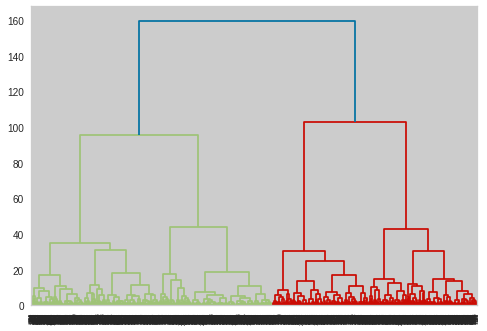

In [ ]:
dendogram=sch.dendrogram(sch.linkage(df_PCA,method="ward")) 
# Ward’s Method: Similarity of two clusters is based on the increase in squared error when two clusters are merged

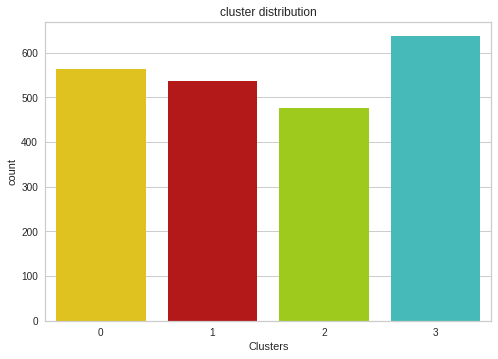

In [ ]:
pal=['gold','#cc0000','#ace600','#33cccc']
c=sns.countplot(x=df['Clusters'],palette=pal)
c.set_title('cluster distribution')
plt.show() 

Now to understand how customers have been clustered, based on what features let's analyze trhough different lots

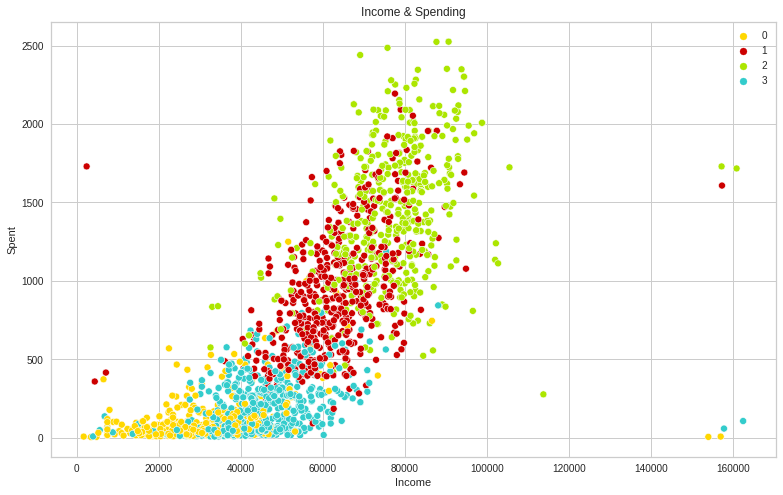

In [ ]:
plt.figure(figsize=(13,8))
t=sns.scatterplot(data=df_old,x=df_old['Income'],y=df_old['Spent'],hue=df_old['Clusters'],palette= pal)
t.set_title("Income & Spending")
plt.legend()

Income vs spending
*   Cluster 0 : low spending,  low income
*   Cluster 1 : high spending, average income
*   Cluster 2 : high spending, high income
*   Cluster 3 : low spending,  average income


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

74.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



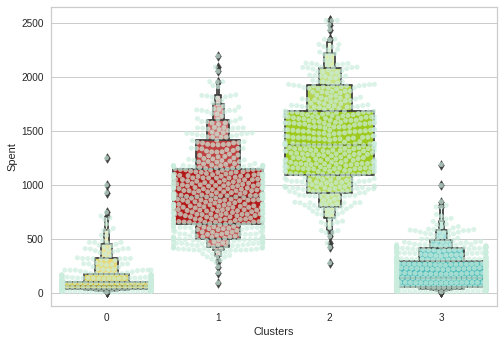

In [ ]:
t=sns.swarmplot(x=df_old['Clusters'],y=df_old['Spent'], color="#CBEDDD", alpha=0.7)
t=sns.boxenplot(x=df_old['Clusters'],y=df_old['Spent'],palette=pal)
plt.show();

The plot above shows that cluster 2 is our biggest set of customers followed by cluster 1 .

In [ ]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent',
       'Clusters'],
      dtype='object')

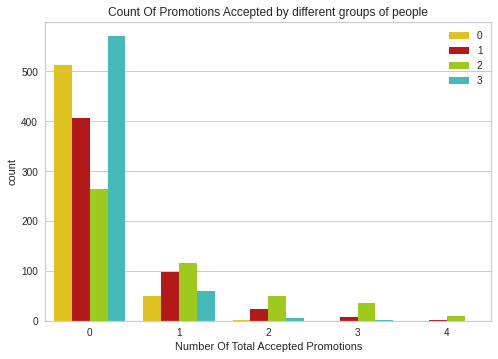

In [ ]:
df_old['Total Promotions']=df_old['AcceptedCmp1'] + df_old['AcceptedCmp2'] + df_old['AcceptedCmp3'] + df_old['AcceptedCmp4'] + df_old['AcceptedCmp5']

t=sns.countplot(x=df_old['Total Promotions'],hue=df_old['Clusters'],palette=pal)
t.set_title('Count Of Promotions Accepted by different groups of people')
t.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show()

People dont take part much in campaigns. Very few participants overall. Perhaps better-targeted and well-planned campaigns are required to increase the sales.

Text(0.5, 1.0, 'Number of Deals Purchased')

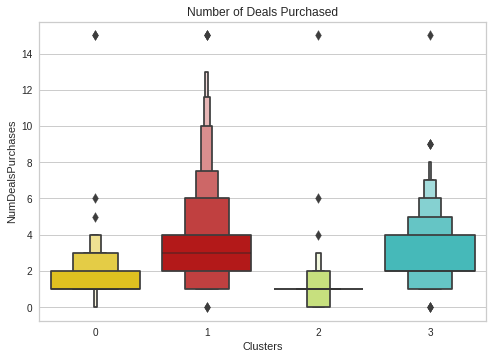

In [ ]:
t=sns.boxenplot(y=df_old['NumDealsPurchases'],x=df_old['Clusters'],palette= pal)
t.set_title('Number of Deals Purchased')

Offering deals did work out well. It has the best outcome with cluster 1 and cluster 3. But here we notice that our regular customers belonging to cluster 2 are not much into the deals.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<Figure size 936x576 with 0 Axes>

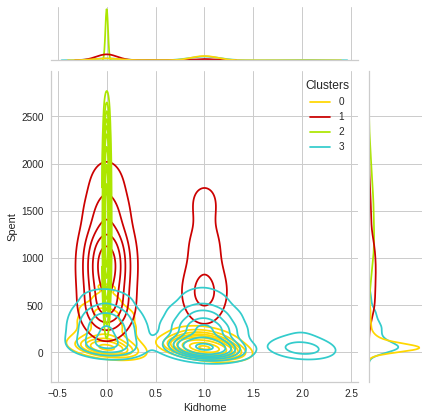

<Figure size 936x576 with 0 Axes>

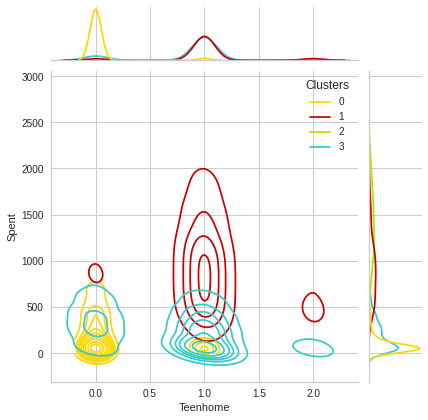

<Figure size 936x576 with 0 Axes>

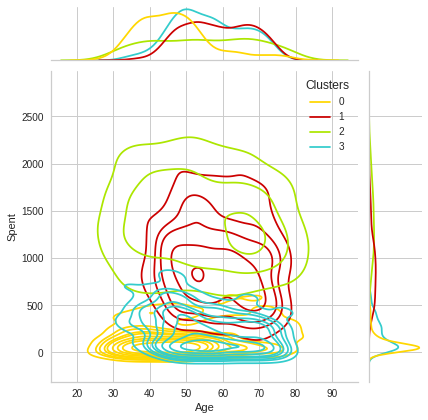

<Figure size 936x576 with 0 Axes>

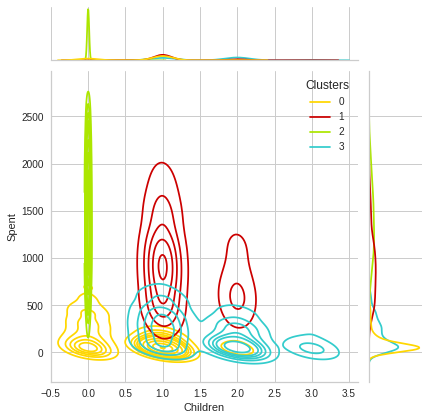

<Figure size 936x576 with 0 Axes>

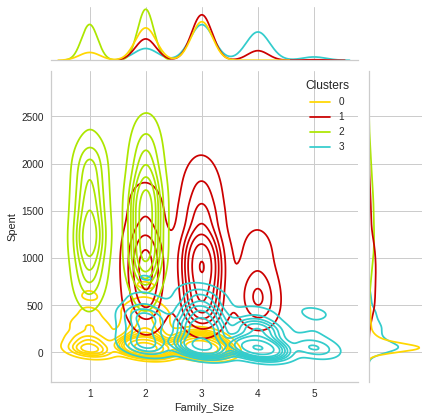

<Figure size 936x576 with 0 Axes>

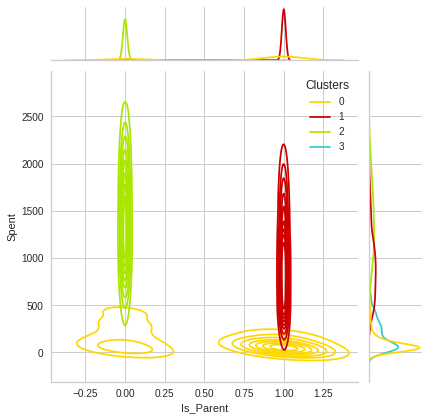

<Figure size 936x576 with 0 Axes>

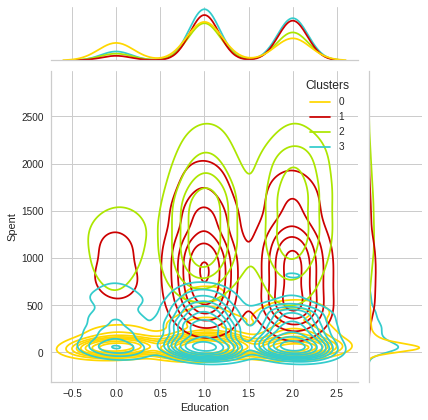

<Figure size 936x576 with 0 Axes>

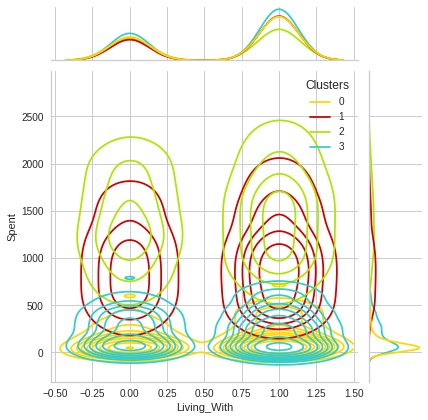

In [ ]:
home=['Kidhome','Teenhome','Age','Children','Family_Size','Is_Parent','Education','Living_With']

for i in home:
    plt.figure(figsize=(13,8))
    sns.jointplot(x=df_old[i],y=df_old['Spent'],hue=df_old['Clusters'],kind='kde',palette=pal)